## Giorgio Zucarelli, Guilherme Mazer, Manoela Busatto, Rodrigo Conte, Sofia Pereira

## Coordenadora: Marina

# Suplementos - Case I 

<div id="indice"></div>

# Índice

1. [Introdução](#introducao)
 
 
2. [Tratamento da base de dados](#tratamento)
    - [2.1 Lidando com valores nulos](#valores-nulos)
    - [2.2 Restaurando respostas das perguntas](#restaurando)
    - [2.3 Transformando variáveis qualitativas em quantitativas](#quali-quanti)
    - [2.4 Escolhendo variáveis para definir persona](#variaveis)


3. [Clusterização](#clusterizacao)
    - [3.1 Método do cotovelo](#metodo-cotovelo)
    - [3.2 Aplicando o modelo](#aplicando)
    - [3.3 Analisando características dos clusters](#analisando)
    - [3.4 Definindo cluster de interesse](#definindo)
    
4. [Conclusão](#conclusao)

-------
<div id="introducao"></div>

# 1. Introdução

O projeto a seguir tem como objetivo auxiliar a +Sup a expandir sua linha de produtos disponíveis com foco em suplementos alimentares. Para isso, será analisada uma base de dados que contém uma pesquisa de mercado, em que possíveis clientes responderam as perguntas interpretadas como variáveis a seguir.

- `Qfreq` - Quantas vezes você consome alimentos de linha fitness ou focados em bem estar (biscoitos fitness, snacks de frutas e oleaginosas, suplementos alimentares) na semana?
- `P2` - Qual o motivo de não utilizar esses produtos? Pode marcar mais de uma opcção
- `P3` - Se esses produtos fossem mais baratos, o quanto você estaria disposto a utilizá-los mais?
- `P4` - Biscoitos
- `P5` - Snacks
- `P6` - Suplementos 
- `P7` - Outros
- `P8` - Uso por recomendação médica
- `P9` - Uso por auto prescrição
- `P12` - Você utiliza/ já utilizou algum aplicativo de suplemento alimentar?
- `P13` - Quais marcas de suplemento você conhece e já utilizou?
- `P14` - Como ficou sabendo sobre essas marcas/ produtos?
- `P15` - Consumo suplementos como Whey Protein
- `P16` - Consumo suplementos de vitaminas (D, B, etc)
- `P17` - Consumo Ômega 3
- `P18` - Outros produtos
- `P19` - Frequento academia mais de 4 vezes na semana
- `P20` - Gosto de praticar esportes
- `P21` - Frequento nutricionistas/ nutrólogos
- `P22` - Consumo carnes (vermelha e branca) pelo menos 5 vezes por semana
- `P23` - Consumo suplementos para emagrecimento
- `P24` - Consumo suplementos para ganho de massa muscular
- `P25` - Prefiro suplementos naturais aos sintéticos
- `P26` - Consumo suplementos para regularizar sistema hormonal
- `Qesc` - Qual seu nível de escolaridade?
- `Qciv` - Qual seu estado civil?
- `Qocup` - Qual é a sua principal ocupação?
- `Qid` - Idade
- `Qgen` - Gênero
- `Qreg` - Região
- `Qclasse` - Classe
  
 
 ** Perguntas P4 até P9 e P15 até P26 são respondidas de acordo com a importância delas ao cliente em uma escala de 1 a 7.**

A base de dados passará por uma limpeza inicial, para depois seguir para a `clusterização` que permitirá a identificação de uma `persona` de interesse para a +Sup.

In [7]:
# Importando bibliotecas 

%matplotlib inline 
import numpy as np
import pandas as pd
import os
import matplotlib as plt
from IPython.display import display
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns



In [8]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Removendo "warnings do código"

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Verificando se a base de dados está na pasta

filename = 'Base - Pesquisa de Mercado.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo Base - Pesquisa de Mercado.xlsx está na mesma pasta do notebook!


In [11]:
df = pd.read_excel('Base - Pesquisa de Mercado.xlsx',sheet_name = 'Pesquisa - Respostas', header=None)

In [12]:
df = df.drop(0)

In [13]:
df = pd.read_excel('Base - Pesquisa de Mercado.xlsx',sheet_name = 'Pesquisa - Respostas', header=1)
df

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
0,4,NaN,NaN,7.0,2.0,7.0,7.0,1.0,1.0,1,...,3.0,7.0,7.0,3,2,3.0,1,31,3,5
1,4,NaN,NaN,5.0,1.0,1.0,3.0,5.0,4.0,1,...,6.0,6.0,4.0,5,1,3.0,1,59,4,3
2,2,NaN,NaN,6.0,1.0,6.0,3.0,6.0,1.0,1,...,7.0,7.0,7.0,4,1,2.0,1,20,2,3
3,1,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2,...,NaN,NaN,NaN,3,2,2.0,1,24,1,5
4,1,NaN,NaN,7.0,7.0,7.0,2.0,7.0,7.0,1,...,7.0,7.0,7.0,4,1,3.0,1,40,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,5,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,2,2,Sp,1
698,5,1; 5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,1,NaN,1,2,Batatais - SP,2
699,5,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,2,NaN,2,4,Natal,1
700,5,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,1,2,natal - rio grande do norte,5


<div id="tratamento"></div>

# 2. Tratamento da base de dados

Essa etapa consiste na padronização da base de dados para que essa fique pronta para a etapa de clusterização. Há dados inconsistentes que deverão ser retirados, respostas que estão fora das opcções de pergunta ou até mesmo respondentes que não serão utilizados na clusterização.

<div id="valores-nulos"></div>

## 2.1 Lidando com valores nulos

A base de dados possui inúmeros valores nulos. Nessa etapa, serão identificados e mapeados os valores nulos, além de interpretados. 

In [14]:
# Retirando espaços nos nomes das colunas

## 2.1 Removendo valores nulos
df.columns = df.columns.str.strip()

In [15]:
# Verificando colunas nulas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Qfreq    702 non-null    int64  
 1   P2       363 non-null    object 
 2   P3       363 non-null    float64
 3   P4       339 non-null    float64
 4   P5       339 non-null    float64
 5   P6       339 non-null    float64
 6   P7       339 non-null    float64
 7   P8       339 non-null    float64
 8   P9       339 non-null    float64
 9   P12      340 non-null    object 
 10  P13      251 non-null    object 
 11  P14      255 non-null    object 
 12  P15      255 non-null    float64
 13  P16      255 non-null    float64
 14  P17      255 non-null    float64
 15  P18      255 non-null    float64
 16  P19      255 non-null    float64
 17  P20      255 non-null    float64
 18  P21      255 non-null    float64
 19  P22      255 non-null    float64
 20  P23      255 non-null    float64
 21  P24      255 non

In [16]:
# Calculando o número de valores nulos por coluna
df.isnull().sum()

Qfreq        0
P2         339
P3         339
P4         363
P5         363
P6         363
P7         363
P8         363
P9         363
P12        362
P13        451
P14        447
P15        447
P16        447
P17        447
P18        447
P19        447
P20        447
P21        447
P22        447
P23        447
P24        447
P25        447
P26        447
Qesc         0
Qciv         0
Qocup      302
Qgen         0
Qid          0
Qreg         0
Qclasse      0
dtype: int64

<AxesSubplot:>

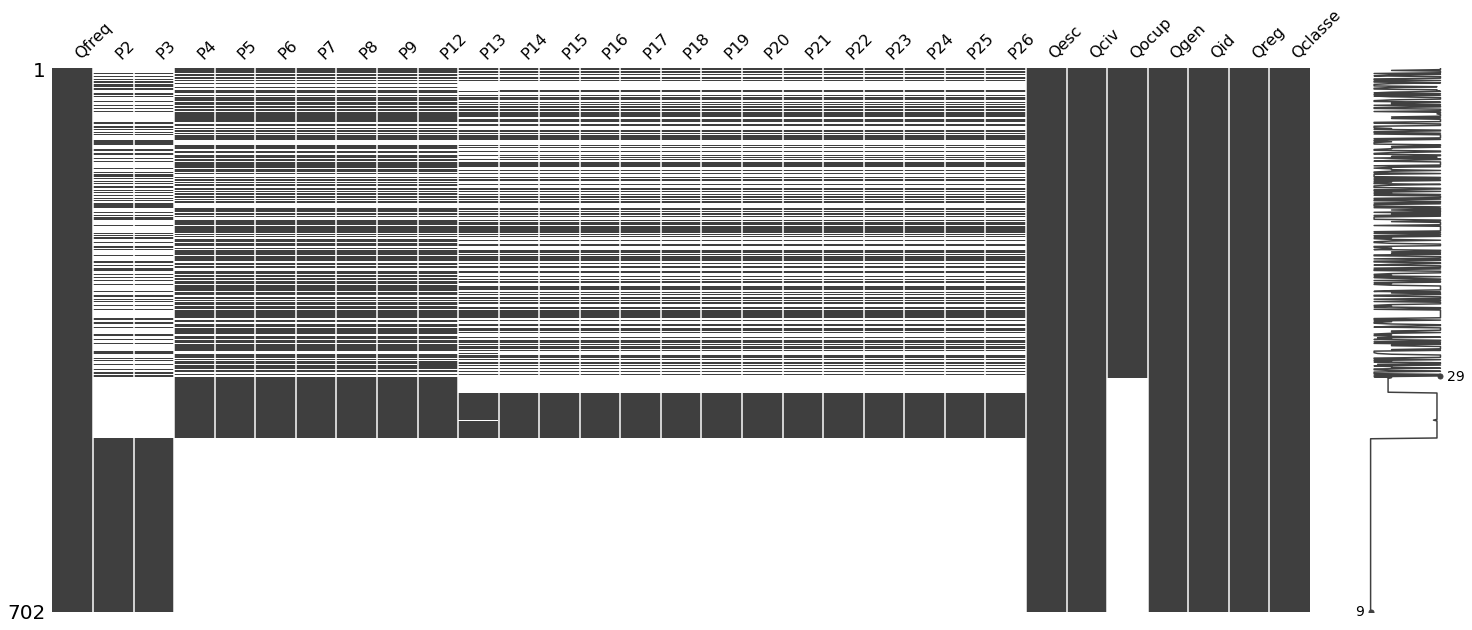

In [17]:
# Instalando biblioteca missingno para visualização de valores nulos e importando
# Se não rodar, utilizar "pip install missingno"
import missingno as msno

#Visualizando espaçamento dos valores nulos nas colunas pela função matrix()
msno.matrix(df)

In [18]:
# Transformando nulos em zeros para não retirar respondentes
df = df.fillna(0)

Ao analisar a base de dados, é visível que grande parte das respostas nulas são devido as pessoas que, na primeira pergunta da pesquisa (Qfreq), responderam que não utilizam esse tipo de produto. Essas pessoas não participam do mercado de suplementos, atuando como interferentes na pesquisa e contribuindo pouco para a clusterização. O primeiro passo será retirar as pessoas que tiveram essa resposta.

In [19]:
# Arrumando respostas de frequência
df["Qfreq"] = df["Qfreq"].replace([1,2,3,4,5],["1-3","4-6","7-10","+10","Não utilizo"])
df["Qfreq"].value_counts(dropna=False)

# Retirando os "Não utilizo"
df["Qfreq"][df["Qfreq"] == 'Não utilizo'] = np.nan # Transformando em nulo resposta inconsistente para depois remover valor
df["Qfreq"].value_counts(dropna=False)

NaN     363
1-3     165
4-6      76
+10      51
7-10     47
Name: Qfreq, dtype: int64

In [20]:
# Retirando os que não utilizam produtos
df_limpo = df.dropna(how = "any")
df_limpo

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
0,+10,0,0.0,7.0,2.0,7.0,7.0,1.0,1.0,1,...,3.0,7.0,7.0,3,2,3.0,1,31,3,5
1,+10,0,0.0,5.0,1.0,1.0,3.0,5.0,4.0,1,...,6.0,6.0,4.0,5,1,3.0,1,59,4,3
2,4-6,0,0.0,6.0,1.0,6.0,3.0,6.0,1.0,1,...,7.0,7.0,7.0,4,1,2.0,1,20,2,3
3,1-3,0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2,...,0.0,0.0,0.0,3,2,2.0,1,24,1,5
4,1-3,0,0.0,7.0,7.0,7.0,2.0,7.0,7.0,1,...,7.0,7.0,7.0,4,1,3.0,1,40,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,+10,0,0.0,7.0,1.0,1.0,5.0,1.0,7.0,1,...,6.0,5.0,7.0,5,1,0.0,1,2,5,2
474,+10,0,0.0,2.0,1.0,1.0,3.0,1.0,3.0,1,...,7.0,7.0,2.0,5,1,0.0,2,3,5,5
475,7-10,0,0.0,7.0,1.0,1.0,4.0,7.0,1.0,1,...,4.0,7.0,5.0,4,2,0.0,1,5,5,4
476,1-3,0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,1,...,2.0,2.0,1.0,5,2,0.0,2,6,5,3


<div id="restaurando"></div>

## 2.2 Restaurando respostas das perguntas

Algumas das perguntas fogem das opcções de respostas pré definidas. Nessa etapa, as informações serão padronizadas, de forma que qualquer resposta possa ser interpretada e avaliada da maneira correta.

In [21]:
# De acordo, pois todos utilizam o produto

## 2.2 Restaurando respostas das perguntas
df_limpo["P2"].value_counts(dropna=False)

0    339
Name: P2, dtype: int64

In [22]:
# De acordo, pois todos utilizam o produto!
df_limpo["P3"].value_counts(dropna=False)

0.0    339
Name: P3, dtype: int64

In [23]:
df_limpo["P4"].value_counts(dropna=False)

7.0    131
6.0     45
4.0     35
5.0     34
3.0     34
2.0     30
1.0     30
Name: P4, dtype: int64

In [24]:
df_limpo["P5"].value_counts(dropna=False)

1.0    152
7.0     53
2.0     33
4.0     30
3.0     26
6.0     23
5.0     22
Name: P5, dtype: int64

In [25]:
df_limpo["P6"].value_counts(dropna=False)

1.0    117
7.0     69
4.0     45
5.0     40
6.0     26
3.0     24
2.0     18
Name: P6, dtype: int64

In [26]:
df_limpo["P7"].value_counts(dropna=False)

7.0    94
4.0    60
6.0    48
3.0    42
5.0    39
1.0    32
2.0    24
Name: P7, dtype: int64

In [27]:
df_limpo["P8"].value_counts(dropna=False)

7.0    114
1.0     96
5.0     34
6.0     30
4.0     29
2.0     21
3.0     15
Name: P8, dtype: int64

In [28]:
df_limpo["P9"].value_counts(dropna=False)

1.0    133
7.0     94
4.0     31
2.0     21
5.0     21
6.0     21
3.0     18
Name: P9, dtype: int64

In [29]:
# Arrumando respostas P12
df_limpo["P12"] = df_limpo["P12"].replace([1],["Sim"])
df_limpo["P12"] = df_limpo["P12"].replace([2],["Não"])
df_limpo["P12"] = df_limpo["P12"].replace([" "],["Remover"])
df_limpo["P12"][df_limpo["P12"] == 'Remover'] = np.nan # Transformando em nulo resposta inconsistente para depois remover valor
df_limpo["P12"].value_counts(dropna=False)


Sim    255
Não     84
Name: P12, dtype: int64

In [30]:
# Arrumando respostas P13
df_limpo["P13"] = df_limpo["P13"].replace([" ", "Tri ; 4"],["Remover", "Remover"])
df_limpo["P13"][df_limpo["P13"] == 'Remover'] = np.nan
df_limpo["P13"].value_counts(dropna=False)



0                    90
4                    43
4 ; 6                26
6                    20
1                    16
2 ; 4                15
1 ; 4                15
2 ; 4 ; 6            14
2                    10
1 ; 4 ; 6             9
5                     6
1 ; 2                 5
4 ; 8                 5
5 ; 6                 4
6 ; 7 ; 8             3
3 ; 4 ; 8             3
7 ; 8                 3
3 ; 4 ; 5             3
3                     3
3 ; 5                 3
5 ; 8                 3
2 ; 3 ; 4 ; 6         3
1 ; 4 ; 5 ; 6         3
1 ; 4 ; 5             2
4 ; 6 ; 7             2
8                     2
1 ; 3 ; 6             2
4 ; 7                 2
1 ; 4 ; 7             2
2 ; 6                 2
1 ; 2 ; 3 ; 4         1
1 ; 4 ; 6 ; 7         1
1 ; 2 ; 4             1
3 ; 4 ; 6             1
2; 3                  1
1 ; 4 ; 5 ; 7         1
4 ; 5                 1
1 ; 3                 1
6 ; 7                 1
3 ; 4 ; 5 ; 6 ; 7     1
2 ; 5                 1
1 ; 7           

In [31]:
# Arrumando respostas P14
df_limpo["P14"] = df_limpo["P14"].replace(["Reportagem na TV ; 1 ; 2 ; 7", "Pelo app"],["Remover", "Remover"])
df_limpo["P14"][df_limpo["P14"] == 'Remover'] = np.nan
df_limpo["P14"].value_counts(dropna=False)

0                            84
2                            54
1                            51
3                            30
1 ; 2                        13
2 ; 3                        10
1 ; 2 ; 3                     8
1 ; 4                         6
1 ; 3 ; 7                     6
4                             5
1 ; 6                         5
2 ; 6                         5
7                             5
1 ; 7                         5
2 ; 4                         4
3 ; 6 ; 7                     3
1 ; 2 ; 3 ; 4 ; 5             3
5                             3
1 ; 4 ; 5                     3
1 ; 2 ; 7                     3
1 ; 2 ; 4 ; 5 ; 7             2
3 ; 4 ; 7                     2
1 ; 2 ; 4 ; 5 ; 6             2
1 ; 5 ; 6                     2
1 ; 3 ; 5                     2
2 ; 7                         2
1 ; 2 ; 3 ; 4 ; 5 ; 6 ; 7     2
NaN                           2
2 ; 4 ; 6                     1
1 ; 4 ; 6                     1
2 ; 3 ; 7                     1
1 ; 2 ; 

In [32]:
df_limpo["P15"].value_counts(dropna=False)

7.0    135
0.0     84
5.0     33
6.0     30
4.0     30
3.0     14
1.0     10
2.0      3
Name: P15, dtype: int64

In [33]:
df_limpo["P16"].value_counts(dropna=False)

7.0    90
0.0    84
5.0    40
4.0    39
6.0    30
1.0    24
3.0    18
2.0    14
Name: P16, dtype: int64

In [34]:
df_limpo["P17"].value_counts(dropna=False)

7.0    91
0.0    84
5.0    37
6.0    34
4.0    34
3.0    21
2.0    20
1.0    18
Name: P17, dtype: int64

In [35]:
df_limpo["P18"].value_counts(dropna=False)

7.0    117
0.0     84
6.0     38
5.0     37
4.0     36
3.0     18
2.0      5
1.0      4
Name: P18, dtype: int64

In [36]:
df_limpo["P19"].value_counts(dropna=False)

7.0    94
0.0    84
6.0    39
5.0    36
4.0    34
1.0    25
3.0    15
2.0    12
Name: P19, dtype: int64

In [37]:
df_limpo["P20"].value_counts(dropna=False)

7.0    155
0.0     84
5.0     34
6.0     23
4.0     21
3.0     13
2.0      8
1.0      1
Name: P20, dtype: int64

In [38]:
df_limpo["P21"].value_counts(dropna=False)

7.0    142
0.0     84
5.0     40
6.0     30
4.0     18
3.0     15
2.0      5
1.0      5
Name: P21, dtype: int64

In [39]:
df_limpo["P22"].value_counts(dropna=False)

7.0    100
0.0     84
5.0     48
6.0     34
4.0     31
2.0     18
3.0     14
1.0     10
Name: P22, dtype: int64

In [40]:
df_limpo["P23"].value_counts(dropna=False)

7.0    135
0.0     84
5.0     33
6.0     30
4.0     30
3.0     14
1.0     10
2.0      3
Name: P23, dtype: int64

In [41]:
df_limpo["P24"].value_counts(dropna=False)

7.0    91
0.0    84
5.0    37
6.0    34
4.0    34
3.0    21
2.0    20
1.0    18
Name: P24, dtype: int64

In [42]:
df_limpo["P25"].value_counts(dropna=False)

7.0    94
0.0    84
6.0    39
5.0    36
4.0    34
1.0    25
3.0    15
2.0    12
Name: P25, dtype: int64

In [43]:
df_limpo["P26"].value_counts(dropna=False)

7.0    100
0.0     84
5.0     48
6.0     34
4.0     31
2.0     18
3.0     14
1.0     10
Name: P26, dtype: int64

In [44]:
# Arrumando respostas Qesc
df_limpo["Qesc"] = df_limpo["Qesc"].replace([1,2,3,4,5,6],["EF_incompleto","EF_completo","EM_incompleto","EM_completo","ES_incompleto", "ES_completo"])
df_limpo["Qesc"].value_counts(dropna=False)

EM_completo      119
ES_incompleto     99
ES_completo       76
EM_incompleto     24
EF_completo       15
EF_incompleto      6
Name: Qesc, dtype: int64

In [45]:
# Arrumando respostas Qciv
df_limpo["Qciv"] = df_limpo["Qciv"].replace([1,2,3,4,5],["Solteiro","Casado","Separado","Divorciado","Viúvo"])
df_limpo["Qciv"].value_counts(dropna=False)

Solteiro      200
Casado        113
Divorciado     16
Separado        7
Viúvo           3
Name: Qciv, dtype: int64

In [46]:
# Arrumando respostas Qocup
df_limpo["Qocup"] = df_limpo["Qocup"].replace([1,2,3,4,5,6],["Meio_tempo","Tempo_integral","Desempregado","Autonomo","Estudante", "Aposentado"])
df_limpo["Qocup"] = df_limpo["Qocup"].replace([0],["Sem resposta"])
df_limpo["Qocup"].value_counts(dropna=False)

Tempo_integral    101
Sem resposta       78
Autonomo           54
Desempregado       47
Meio_tempo         28
Estudante          24
Aposentado          7
Name: Qocup, dtype: int64

In [47]:
# Arrumando respostas Qid
df_limpo["Qid"][df_limpo["Qid"] >= 55] = 6
df_limpo["Qid"][df_limpo["Qid"] >= 45] = 5
df_limpo["Qid"][df_limpo["Qid"] >= 35] = 4
df_limpo["Qid"][df_limpo["Qid"] >= 25] = 3
df_limpo["Qid"][df_limpo["Qid"] >= 18] = 2
df_limpo["Qid"][df_limpo["Qid"] == 16] = 1
df_limpo["Qid"][df_limpo["Qid"] == 17] = 1

# Ajustando faixas
df_limpo["Qid"] = df_limpo["Qid"].replace([1,2,3,4,5,6],["-18","18-24","25-34","35-44","45-54", "55+"])
df_limpo["Qid"].value_counts(dropna=False)


18-24    124
25-34     73
35-44     64
45-54     44
55+       24
-18       10
Name: Qid, dtype: int64

In [48]:
# Arrumando respostas Qgen
df_limpo["Qgen"] = df_limpo["Qgen"].replace([1,2, 3],["Masculino","Feminino", "Remover"])
df_limpo["Qgen"][df_limpo["Qgen"] == 'Remover'] = np.nan
df_limpo["Qgen"].value_counts(dropna=False)

Feminino     181
Masculino    156
NaN            2
Name: Qgen, dtype: int64

In [49]:
# Arrumando respostas Qreg
df_limpo["Qreg"] = df_limpo["Qreg"].replace([1,2,3,4,5],["Sudeste","Sul","Centro_Oeste","Nordeste","Norte"])
df_limpo["Qreg"] = df_limpo["Qreg"].replace(["Recife","Maceió Alagoas","Maceió","Maceió- Alagoas","maceió","São Paulo, SP", "Sp Sp","Batatais-SP", "RECIFE-PE", "Alagoas", "Maceió AL", "Sp", "Batatais - SP", "Natal", "natal - rio grande do norte","Batatais"],["Nordeste","Nordeste", "Nordeste", "Nordeste", "Nordeste", "Sudeste","Sudeste", "Sudeste","Nordeste", "Nordeste", "Nordeste", "Sudeste", "Sudeste", "Nordeste","Nordeste","Sudeste"])
df_limpo["Qreg"].value_counts(dropna=False)

Sudeste         178
Nordeste         81
Sul              31
Norte            28
Centro_Oeste     21
Name: Qreg, dtype: int64

In [50]:
# Arrumando respostas Qclasse
df_limpo["Qclasse"] = df_limpo["Qclasse"].replace([1,2,3,4,5],["Classe A","Classe B","Classe C","Classe D","Classe E"])
df_limpo["Qclasse"] = df_limpo["Qclasse"].replace(["Entre 1.000 e1.999"],["Classe D"])
df_limpo["Qclasse"].value_counts(dropna=False)

Classe C    101
Classe D     75
Classe E     72
Classe B     48
Classe A     43
Name: Qclasse, dtype: int64

In [51]:
# Com as respostas arrumadas, removeremos os números nulos que substituiram respostas inconsistentes
df_limpo_2 = df_limpo.dropna(how = "any")
df_limpo_2

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
0,+10,0,0.0,7.0,2.0,7.0,7.0,1.0,1.0,Sim,...,3.0,7.0,7.0,EM_incompleto,Casado,Desempregado,Masculino,25-34,Centro_Oeste,Classe E
1,+10,0,0.0,5.0,1.0,1.0,3.0,5.0,4.0,Sim,...,6.0,6.0,4.0,ES_incompleto,Solteiro,Desempregado,Masculino,55+,Nordeste,Classe C
2,4-6,0,0.0,6.0,1.0,6.0,3.0,6.0,1.0,Sim,...,7.0,7.0,7.0,EM_completo,Solteiro,Tempo_integral,Masculino,18-24,Sul,Classe C
3,1-3,0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,Não,...,0.0,0.0,0.0,EM_incompleto,Casado,Tempo_integral,Masculino,18-24,Sudeste,Classe E
4,1-3,0,0.0,7.0,7.0,7.0,2.0,7.0,7.0,Sim,...,7.0,7.0,7.0,EM_completo,Solteiro,Desempregado,Masculino,35-44,Nordeste,Classe E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,+10,0,0.0,7.0,1.0,1.0,5.0,1.0,7.0,Sim,...,6.0,5.0,7.0,ES_incompleto,Solteiro,Sem resposta,Masculino,18-24,Norte,Classe B
474,+10,0,0.0,2.0,1.0,1.0,3.0,1.0,3.0,Sim,...,7.0,7.0,2.0,ES_incompleto,Solteiro,Sem resposta,Feminino,25-34,Norte,Classe E
475,7-10,0,0.0,7.0,1.0,1.0,4.0,7.0,1.0,Sim,...,4.0,7.0,5.0,EM_completo,Casado,Sem resposta,Masculino,45-54,Norte,Classe D
476,1-3,0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,Sim,...,2.0,2.0,1.0,ES_incompleto,Casado,Sem resposta,Feminino,55+,Norte,Classe C


<div id="quali-quanti"></div>

## 2.3 Transformando variáveis qualitativas em quantitativas

Para que se torne possível a utilização das variáveis qualitativas na clusterização, essas serão transformadas em variáveis quantitativas.

In [52]:
# Transformando variáveis qualitativas em quantitativas (apenas as demográficas)

# Importando do sklearn para aplicação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

## 2.3 Transformando variáveis qualitativas em quantitativas
from sklearn.compose import make_column_transformer

# Selecionando variaveis qualitativas a serem transformadas
transformer = make_column_transformer(
    (OneHotEncoder(), ["Qfreq","Qid","Qreg","Qclasse"]), 
    remainder='passthrough')


transformed = transformer.fit_transform(df_limpo_2)
df_to_model = pd.DataFrame(transformed, columns=transformer.get_feature_names())
df_to_model

,onehotencoder__x0_+10,onehotencoder__x0_1-3,onehotencoder__x0_4-6,onehotencoder__x0_7-10,onehotencoder__x1_-18,onehotencoder__x1_18-24,onehotencoder__x1_25-34,onehotencoder__x1_35-44,onehotencoder__x1_45-54,onehotencoder__x1_55+,...,P21,P22,P23,P24,P25,P26,Qesc,Qciv,Qocup,Qgen
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,7.0,7.0,7.0,3.0,7.0,7.0,EM_incompleto,Casado,Desempregado,Masculino
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7.0,4.0,6.0,6.0,6.0,4.0,ES_incompleto,Solteiro,Desempregado,Masculino
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,7.0,1.0,7.0,7.0,7.0,EM_completo,Solteiro,Tempo_integral,Masculino
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,EM_incompleto,Casado,Tempo_integral,Masculino
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.0,7.0,7.0,7.0,7.0,7.0,EM_completo,Solteiro,Desempregado,Masculino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,7.0,7.0,6.0,5.0,7.0,ES_incompleto,Solteiro,Sem resposta,Masculino
330,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,2.0,7.0,7.0,7.0,2.0,ES_incompleto,Solteiro,Sem resposta,Feminino
331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,5.0,4.0,4.0,7.0,5.0,EM_completo,Casado,Sem resposta,Masculino
332,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,2.0,2.0,2.0,1.0,ES_incompleto,Casado,Sem resposta,Feminino


<div id="variaveis"></div>

## 2.4 Escolhendo variáveis para definir persona

A fim de definir a persona do cliente, eliminou-se perguntas que não fazem sentido para a clusterização. A clusterização busca separar grupos de pessoas e não seus interesses específicos, que serão analisados após a separação de cada um dos grupos. Logo, a clusterização será baseada nas variáveis a seguir.

- `Qfreq` - Quantas vezes você consome alimentos de linha fitness ou focados em bem estar na semana?
- `Qid` - Idade
- `Qreg` - Região
- `Qclasse` - Classe

In [53]:
# Removendo variáveis que não serão utilizadas na clusterização
main_variables = df_to_model.drop(["P2","P3","P4","P5","P6","P7","P8","P9","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P25","P26", "Qesc", "Qciv", "Qocup", "Qgen"], axis=1)

<div id="clusterizacao"></div>

# 3. Clusterização

Essa etapa consiste no processo de clusterização, ou seja, a divisão da base de dados em clusters baseado em variáveis.

<div id="metodo-cotovelo"></div>

## 3.1 Método do cotovelo

O método de clusterização que será utilizado é chamado Kmeans. Esse método, de forma resumida, interpreta cada linha de um dataframe como diferentes "pontos" e realiza um cálculo de distância entre cada um deles. A partir disso, ele agrupa os pontos de acordo com o número de clusters previamente definido e determina centros, ou seja, médias de cada um dos grupos (clusters).

O método do cotovelo visa definir a melhor quantidade de clusters que serão utilizados para realizar o Kmeans. 

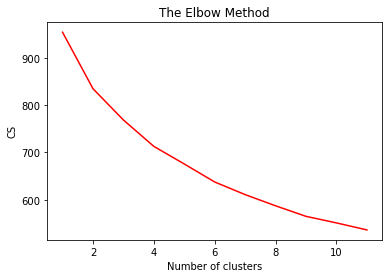

In [54]:
#Importando o modelo Kmeans da biblioteca Scikit Learn
from sklearn.cluster import KMeans

## 3.1 Método do cotovelo

O método de clusterização que será utilizado é chamado Kmeans. Esse método, de forma resumida, interpreta cada linha de um dataframe como diferentes "pontos" e realiza um cálculo de distância entre cada um deles. A partir disso, ele agrupa os pontos de acordo com o número de clusters previamente definido e determina centros, ou seja, médias de cada um dos grupos (clusters).

O método do cotovelo visa definir a melhor quantidade de clusters que serão utilizados para realizar o Kmeans. 

#Método do cotovelo - Aplicando o modelo Kmeans para diferentes numeros de clusters
cs = []
for i in range(1, 12):
    cs.append(KMeans(n_clusters = i, max_iter = 10000, n_init = 100, random_state = 0).fit(main_variables).inertia_)
plt.plot(range(1, 12), cs, color="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')<div id="clusterizacao"></div>

# 3. Clusterização
plt.show()

<div id="aplicando"></div>

## 3.2 Aplicando o modelo 

Como pode ser observado pelo gráfico acima, o momento em que o diametro dos clusters passa a ter uma mudança significantemente menor não está tão claro. Para que fique mais evidente, será utilizada uma biblioteca que interpreta o gráfico do cotovelo e demonstra o melhor número de clusters.

In [117]:

from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
   range(1, 12), cs, curve="convex", direction="decreasing"
)

n_cluster = kl.elbow
print(n_cluster)


4


In [57]:
#Definindo o número de clusters
kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(main_variables)

KMeans(n_clusters=4, random_state=0)

In [58]:
clus = kmeans.fit_predict(main_variables)
centroids = kmeans.cluster_centers_

In [59]:
from sklearn.metrics import silhouette_score

#Utilizando métrica da silhouette_score para avaliar a clusterização
silhouette_ = silhouette_score(main_variables, clus)

print(silhouette_)

0.13506265611054954


In [60]:
kmeans.fit(main_variables)
inertia = kmeans.inertia_
print(f"Inércia (SSE): {inertia}")

Inércia (SSE): 718.5796449112279


In [61]:
# Adicionando o cluster como coluna na base de dados, possibilitando a análise de cada grupo
kmeans = KMeans(n_clusters=4, max_iter = 10000, n_init = 100, random_state = 0) 
clus = kmeans.fit_predict(main_variables)

df_limpo_2.loc[:, 'cluster'] = clus
df_limpo_2

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse,cluster
0,+10,0,0.0,7.0,2.0,7.0,7.0,1.0,1.0,Sim,...,7.0,7.0,EM_incompleto,Casado,Desempregado,Masculino,25-34,Centro_Oeste,Classe E,2
1,+10,0,0.0,5.0,1.0,1.0,3.0,5.0,4.0,Sim,...,6.0,4.0,ES_incompleto,Solteiro,Desempregado,Masculino,55+,Nordeste,Classe C,3
2,4-6,0,0.0,6.0,1.0,6.0,3.0,6.0,1.0,Sim,...,7.0,7.0,EM_completo,Solteiro,Tempo_integral,Masculino,18-24,Sul,Classe C,2
3,1-3,0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,Não,...,0.0,0.0,EM_incompleto,Casado,Tempo_integral,Masculino,18-24,Sudeste,Classe E,1
4,1-3,0,0.0,7.0,7.0,7.0,2.0,7.0,7.0,Sim,...,7.0,7.0,EM_completo,Solteiro,Desempregado,Masculino,35-44,Nordeste,Classe E,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,+10,0,0.0,7.0,1.0,1.0,5.0,1.0,7.0,Sim,...,5.0,7.0,ES_incompleto,Solteiro,Sem resposta,Masculino,18-24,Norte,Classe B,2
474,+10,0,0.0,2.0,1.0,1.0,3.0,1.0,3.0,Sim,...,7.0,2.0,ES_incompleto,Solteiro,Sem resposta,Feminino,25-34,Norte,Classe E,2
475,7-10,0,0.0,7.0,1.0,1.0,4.0,7.0,1.0,Sim,...,7.0,5.0,EM_completo,Casado,Sem resposta,Masculino,45-54,Norte,Classe D,2
476,1-3,0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,Sim,...,2.0,1.0,ES_incompleto,Casado,Sem resposta,Feminino,55+,Norte,Classe C,2


In [62]:
# Adicionando o cluster como coluna na base de dados que contém apenas as colunas utilizadas no modelo
# Possibilitando a análise de cada grupo
df_to_model.loc[:, 'cluster'] = clus
df_to_model

,onehotencoder__x0_+10,onehotencoder__x0_1-3,onehotencoder__x0_4-6,onehotencoder__x0_7-10,onehotencoder__x1_-18,onehotencoder__x1_18-24,onehotencoder__x1_25-34,onehotencoder__x1_35-44,onehotencoder__x1_45-54,onehotencoder__x1_55+,...,P22,P23,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,7.0,7.0,3.0,7.0,7.0,EM_incompleto,Casado,Desempregado,Masculino,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,6.0,6.0,6.0,4.0,ES_incompleto,Solteiro,Desempregado,Masculino,3
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,1.0,7.0,7.0,7.0,EM_completo,Solteiro,Tempo_integral,Masculino,2
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,EM_incompleto,Casado,Tempo_integral,Masculino,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.0,7.0,7.0,7.0,7.0,EM_completo,Solteiro,Desempregado,Masculino,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,7.0,6.0,5.0,7.0,ES_incompleto,Solteiro,Sem resposta,Masculino,2
330,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,7.0,7.0,7.0,2.0,ES_incompleto,Solteiro,Sem resposta,Feminino,2
331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,4.0,4.0,7.0,5.0,EM_completo,Casado,Sem resposta,Masculino,2
332,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,2.0,2.0,1.0,ES_incompleto,Casado,Sem resposta,Feminino,2


<div id="analisando"></div>

## 3.3 Analisando características dos clusters

Nessa etapa serão analisadas todas as características dos clusters obtidos de forma a embasar a decisão em um cluster específico sobre o qual será traçada a persona.

In [118]:
# Função que demonstra porcentagens (qualitativas) e média (quantitativas)

for col in df_limpo_2.drop('cluster', axis=1).columns:
    for cl in np.sort(df_limpo_2.cluster.unique()):
        if df_limpo_2.dtypes[col] == object:
            vc = 100*df_limpo_2.loc[df_limpo_2.cluster==cl,col].value_counts()/(df_limpo_2.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
        else:      
            print(f'{cl:d}; {col};{df_limpo_2.loc[df_limpo_2.cluster==cl, col].mean():.2f}'.replace('.', ','))
            
# Printando para visualizar as características da a base completa para comparar com os clusters
for col in df_limpo_2.drop('cluster', axis=1).columns:
    if df_limpo_2.dtypes[col] == object:
        vc = 100*df_limpo_2.loc[:, col].value_counts()/(df_limpo_2.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:      
        print(f'All; {col};{df_limpo_2.loc[:, col].mean():.2f}'.replace('.', ','))

0; Qfreq_1-3; 54,46%
0; Qfreq_4-6; 21,78%
0; Qfreq_+10; 11,88%
0; Qfreq_7-10; 11,88%
1; Qfreq_1-3; 32,89%
1; Qfreq_4-6; 30,26%
1; Qfreq_+10; 19,74%
1; Qfreq_7-10; 17,11%
2; Qfreq_1-3; 48,05%
2; Qfreq_4-6; 20,78%
2; Qfreq_+10; 18,18%
2; Qfreq_7-10; 12,99%
3; Qfreq_1-3; 57,50%
3; Qfreq_4-6; 18,75%
3; Qfreq_7-10; 15,00%
3; Qfreq_+10;  8,75%
0; P2_0,0; 100,00%
1; P2_0,0; 100,00%
2; P2_0,0; 100,00%
3; P2_0,0; 100,00%
0; P3;0,00
1; P3;0,00
2; P3;0,00
3; P3;0,00
0; P4;4,94
1; P4;4,86
2; P4;5,10
3; P4;4,95
0; P5;3,12
1; P5;4,21
2; P5;1,96
3; P5;2,96
0; P6;3,70
1; P6;2,70
2; P6;4,17
3; P6;4,08
0; P7;4,27
1; P7;4,87
2; P7;5,03
3; P7;4,67
0; P8;4,54
1; P8;3,29
2; P8;4,90
3; P8;4,21
0; P9;2,36
1; P9;5,32
2; P9;3,48
3; P9;4,01
0; P12_Sim; 74,26%
0; P12_Não; 25,74%
1; P12_Sim; 73,68%
1; P12_Não; 26,32%
2; P12_Sim; 74,03%
2; P12_Não; 25,97%
3; P12_Sim; 78,75%
3; P12_Não; 21,25%
0; P13_0; 29,70%
0; P13_4; 16,83%
0; P13_1;  5,94%
0; P13_4 ; 6;  5,94%
0; P13_1 ; 4;  5,94%
0; P13_6;  5,94%
0; P13_1 ; 4 ;

In [64]:
#Verificando qual cluster aparece mais em porcentagem
df_to_model['cluster'].value_counts(normalize= True)

0    0.302395
3    0.239521
2    0.230539
1    0.227545
Name: cluster, dtype: float64

In [65]:
main_variables.loc[:, 'cluster'] = clus

In [66]:
#Verificando qual cluster aparece mais em valores absolutos
main_variables['cluster'].value_counts()

0    101
3     80
2     77
1     76
Name: cluster, dtype: int64

In [67]:
# Observando os clusters apenas com o dataframe com as perguntas selecionadas 

# Função que demonstra porcentagens (qualitativas) e média (quantitativas)
for col in main_variables.drop('cluster', axis=1).columns:
    for cl in np.sort(main_variables.cluster.unique()):
        if main_variables.dtypes[col] == object:
            vc = 100*main_variables.loc[main_variables.cluster==cl,col].value_counts()/(main_variables.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
        else:      
            print(f'{cl:d}; {col};{main_variables.loc[main_variables.cluster==cl, col].mean():.2f}'.replace('.', ','))
            
# Printando para visualizar as características da a base completa para comparar com os clusters            
for col in main_variables.drop('cluster', axis=1).columns:
    if main_variables.dtypes[col] == object:
        vc = 100*main_variables.loc[:, col].value_counts()/(main_variables.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:      
        print(f'All; {col};{msin_variables.loc[:, col].mean():.2f}'.replace('.', ','))

0; onehotencoder__x0_+10_0,0; 88,12%
0; onehotencoder__x0_+10_1,0; 11,88%
1; onehotencoder__x0_+10_0,0; 80,26%
1; onehotencoder__x0_+10_1,0; 19,74%
2; onehotencoder__x0_+10_0,0; 81,82%
2; onehotencoder__x0_+10_1,0; 18,18%
3; onehotencoder__x0_+10_0,0; 91,25%
3; onehotencoder__x0_+10_1,0;  8,75%
0; onehotencoder__x0_1-3_1,0; 54,46%
0; onehotencoder__x0_1-3_0,0; 45,54%
1; onehotencoder__x0_1-3_0,0; 67,11%
1; onehotencoder__x0_1-3_1,0; 32,89%
2; onehotencoder__x0_1-3_0,0; 51,95%
2; onehotencoder__x0_1-3_1,0; 48,05%
3; onehotencoder__x0_1-3_1,0; 57,50%
3; onehotencoder__x0_1-3_0,0; 42,50%
0; onehotencoder__x0_4-6_0,0; 78,22%
0; onehotencoder__x0_4-6_1,0; 21,78%
1; onehotencoder__x0_4-6_0,0; 69,74%
1; onehotencoder__x0_4-6_1,0; 30,26%
2; onehotencoder__x0_4-6_0,0; 79,22%
2; onehotencoder__x0_4-6_1,0; 20,78%
3; onehotencoder__x0_4-6_0,0; 81,25%
3; onehotencoder__x0_4-6_1,0; 18,75%
0; onehotencoder__x0_7-10_0,0; 88,12%
0; onehotencoder__x0_7-10_1,0; 11,88%
1; onehotencoder__x0_7-10_0,0; 82,89

<div id="definindo"></div>

## 3.4 Definindo cluster de interesse

Analisando os quatro clusters obtidos, optou-se pelo cluster 1 para definição da persona. Essa decisão se pautou em alguns motivos. Primeiramente, o cluster representa uma porcentagem relevante da base de dados. Além disso, analisou-se características demográficas.
- Para `Qid`:
    - 100% das pessoas tem de 18 a 24 anos
- Para `Qclasse`:
    - 42% classe A, o que é relevante devido ao ticket médio alto dos produtos
- Para `Qgen`:
    - 51% masculino
    - 49% feminino
- Para `Qesc`:
    - 55% ensino superior incompleto, o que vai de acordo com a faixa etária do cluster

In [121]:
# Criando data frame apenas com o cluster 1
filtro = df_limpo_2['cluster'] == 1
df_1 = df_limpo_2.loc[filtro]
df_1

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse,cluster
3,1-3,0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,Não,...,0.0,0.0,EM_incompleto,Casado,Tempo_integral,Masculino,18-24,Sudeste,Classe E,1
29,1-3,0,0.0,4.0,1.0,7.0,2.0,1.0,3.0,Sim,...,5.0,5.0,EM_completo,Casado,Autonomo,Masculino,18-24,Sudeste,Classe E,1
63,1-3,0,0.0,2.0,1.0,2.0,6.0,2.0,3.0,Não,...,0.0,0.0,EM_completo,Casado,Autonomo,Masculino,18-24,Sudeste,Classe E,1
66,4-6,0,0.0,7.0,7.0,1.0,3.0,7.0,7.0,Sim,...,7.0,7.0,ES_completo,Solteiro,Autonomo,Masculino,18-24,Sudeste,Classe D,1
69,1-3,0,0.0,5.0,5.0,2.0,4.0,5.0,4.0,Sim,...,6.0,3.0,EM_completo,Casado,Desempregado,Masculino,18-24,Sudeste,Classe D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,4-6,0,0.0,6.0,6.0,1.0,6.0,7.0,7.0,Sim,...,6.0,4.0,EM_completo,Solteiro,Sem resposta,Feminino,18-24,Sudeste,Classe C,1
464,4-6,0,0.0,7.0,7.0,1.0,7.0,1.0,7.0,Sim,...,7.0,7.0,ES_incompleto,Solteiro,Sem resposta,Feminino,18-24,Sudeste,Classe A,1
465,+10,0,0.0,7.0,7.0,1.0,3.0,1.0,7.0,Sim,...,6.0,6.0,ES_incompleto,Solteiro,Sem resposta,Masculino,18-24,Sudeste,Classe A,1
468,+10,0,0.0,1.0,1.0,4.0,7.0,1.0,7.0,Sim,...,7.0,7.0,ES_incompleto,Solteiro,Sem resposta,Masculino,18-24,Sudeste,Classe B,1


------
<div id="conclusao"></div>

# 4. Conclusão

In [129]:
df_1["Qfreq"].value_counts(normalize=True)

1-3     0.328947
4-6     0.302632
+10     0.197368
7-10    0.171053
Name: Qfreq, dtype: float64

Com a clusterização e a definição do cluster de interesse feitos, é possível traçar a persona de interesse para expansão de produtos do cliente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
